# 6. Domaća zadaća, Neizrazito Evolucijsko i Neuroračunarstvo

![slika 1](res/img/1.png)
![slika 2](res/img/2.png)

## 1. Zadatak

![slika 3](res/img/3.png)

Ako $x$ je $A_i$ i $y$ je $B_i$ tada $z = p_ix + q_iy + r_i$
$$ \pi_i = \alpha_i \beta_i $$
$$ \alpha_i = \frac{1}{1 + e^{b_i(x-a_i)}} $$
$$ z = p_i x + q_i y + r_i $$
$$ o_k = \frac{\sum_{i=1}^{m}\pi_i z_i }{\sum_{i=1}^{m} \pi_i } $$
$ a_i $
$$ \frac{\partial E_k}{\partial a_i} = \frac{\partial E_k}{\partial o_k}\frac{\partial o_k}{\partial \pi_i}\frac{\partial \pi_i}{\partial \alpha_i}\frac{\partial \alpha_i}{\partial a_i} $$
$$ \frac{\partial E_k}{\partial o_k} = -(y_k - o_k) $$
$$ \frac{\partial o_k}{\partial \pi_i} = \frac{\sum_{j=1,j!=i}^{m} \pi_j(z_i-z_j)}{(\sum_{j=1}^{m} \pi_j)^2} $$
$$ \frac{\partial \pi_i}{\partial \alpha_i} = \beta_i $$
$$ \frac{\partial \alpha_i}{\partial a_i} = b_i\alpha_i(1-\alpha_i) $$
$$ \frac{\partial E_k}{\partial a_i} = -(y_k - o_k) \frac{\sum_{j=1,j!=i}^{m} \pi_j(z_i-z_j)}{(\sum_{j=1}^{m} \pi_j)^2} \pi_i b_i(1-\alpha_i) $$

$ b_i $
$$ \frac{\partial E_k}{\partial b_i} = \frac{\partial E_k}{\partial o_k}\frac{\partial o_k}{\partial \pi_i}\frac{\partial \pi_i}{\partial \alpha_i}\frac{\partial \alpha_i}{\partial b_i} $$
$$ \frac{\partial \alpha_i}{\partial b_i} = -(x - a_i)\alpha_i(1-\alpha_i) $$
$$ \frac{\partial E_k}{\partial b_i} = -(y_k - o_k) \frac{\sum_{j=1,j!=i}^{m} \pi_j(z_i-z_j)}{(\sum_{j=1}^{m} \pi_j)^2} \pi_i (a_i - x)(1-\alpha_i) $$

$ p_i $
$$ \frac{\partial E_k}{\partial p_i} = \frac{\partial E_k}{\partial o_k} \frac{\partial o_k}{\partial z_i} \frac{\partial z_i}{\partial p_i} $$
$$ \frac{\partial o_k}{\partial z_i} = \frac{\pi_i}{\sum_{j=1}^{m} \pi_j} $$
$$ \frac{\partial z_i}{\partial p_i} = x_i $$
$$ \frac{\partial E_k}{\partial p_i} = -(y_k - o_k) \frac{\pi_i x_i}{\sum_{j=1}^{m} \pi_j}  $$

$ q_i $
$$ \frac{\partial E_k}{\partial q_i} = \frac{\partial E_k}{\partial o_k} \frac{\partial o_k}{\partial z_i} \frac{\partial z_i}{\partial q_i} $$
$$ \frac{\partial z_i}{\partial q_i} = y_i $$
$$ \frac{\partial E_k}{\partial q_i} = -(y_k - o_k) \frac{\pi_i y_i}{\sum_{j=1}^{m} \pi_j}  $$

$ r_i $
$$ \frac{\partial E_k}{\partial r_i} = \frac{\partial E_k}{\partial o_k} \frac{\partial o_k}{\partial z_i} \frac{\partial z_i}{\partial r_i} $$
$$ \frac{\partial z_i}{\partial r_i} = 1 $$
$$ \frac{\partial E_k}{\partial r_i} = -(y_k - o_k) \frac{\pi_i}{\sum_{j=1}^{m} \pi_j}  $$

## 3. Zadatak

![slika 4](res/img/4.png)

In [1]:
import src.utils as utils
import src.anfis as anfis
import src.rule as rule

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    return (np.square(x - 1) + np.square(y + 2) - 5*x*y + 3) * np.square(np.cos(x/5))

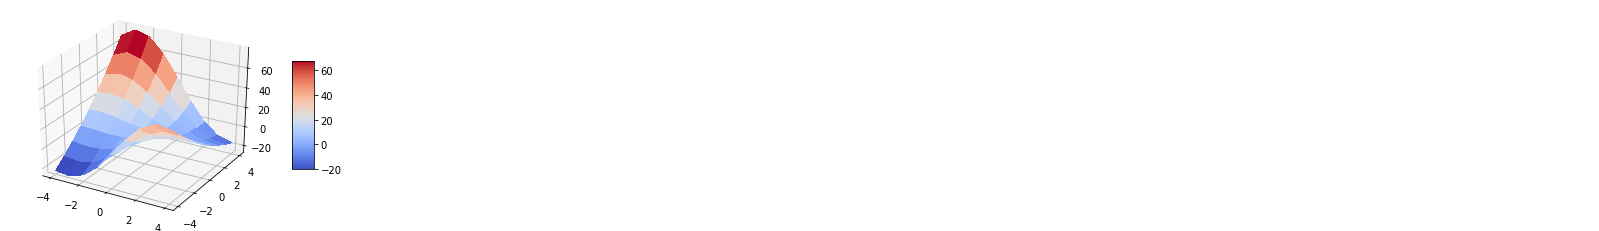

In [2]:
# Your code here
data = utils.generate_data()

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-4, 5, 1)
Y = np.arange(-4, 5, 1)
X, Y = np.meshgrid(X, Y)
Z = (np.square(X-1) + np.square(Y + 2) - 5*X*Y + 3)*np.square(np.cos(X/5))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 4. Zadatak

![slika 5](res/img/5.png)

### 4.1.1 stohastički

Za jedno pravilo: MSE = 483.0533567108517
Za dva pravila: MSE = 479.8373415792599


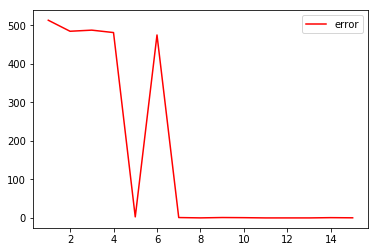

optimalan broj pravila je 5, MSE = 2.916162


In [9]:
#stohastički
model1 = anfis.ANFIS(max_iter=10000, n_rules = 1)
model2 = anfis.ANFIS(max_iter=10000, n_rules = 2)

model1.fit_stohastic()
model2.fit_stohastic()

error1 = model1.mean_squared_error
error2 = model2.mean_squared_error

errors = []

for i in range(1, 16):
    model = anfis.ANFIS(max_iter=10000, n_rules = i)
    model.fit_stohastic()
    errors.append(model.mean_squared_error)

print("Za jedno pravilo: MSE =", error1)
print("Za dva pravila: MSE =", error2)

plt.plot(range(1, 16), errors, 'r', label='error')
plt.legend()
plt.show()

min_rules = np.argmin(errors) + 1

print("optimalan broj pravila je %d, MSE = %f" % (5, errors[4]))

### 4.1.2. batch

In [ ]:
#batch
model1 = anfis.ANFIS(max_iter=10000, n_rules = 1, learning_rate = 0.001)
model2 = anfis.ANFIS(max_iter=10000, n_rules = 2, learning_rate = 0.001)

model1.fit_batch()
model2.fit_batch()

error1 = model1.mean_squared_error
error2 = model2.mean_squared_error

errors = []

for i in range(1, 16):
    model = anfis.ANFIS(max_iter=10000, n_rules = i, learning_rate = 0.001)
    model.fit_batch()
    errors.append(model.mean_squared_error)

print("Za jedno pravilo: MSE =", error1)
print("Za dva pravila: MSE =", error2)

plt.plot(range(1, 16), errors, 'r', label='error')
plt.legend()
plt.show()

min_rules = np.argmin(errors) + 1

print("optimalan broj pravila je %d, MSE = %f" % (5, errors[4]))

### 4.2

naučena funkcija za broj pravila = 1


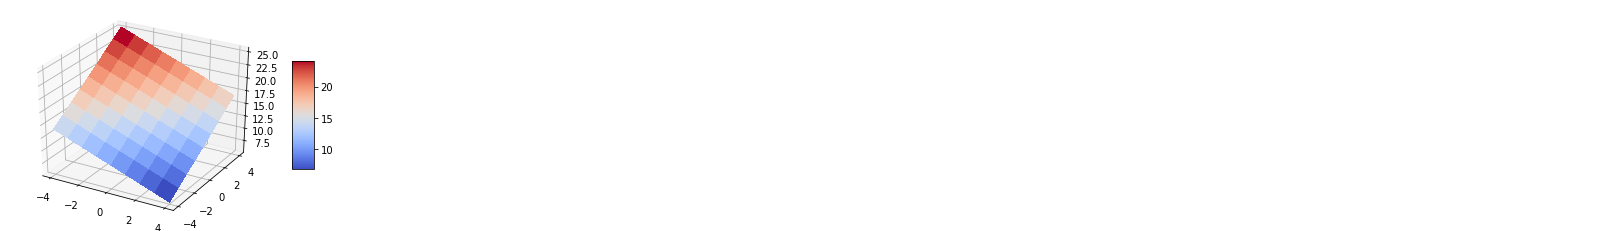

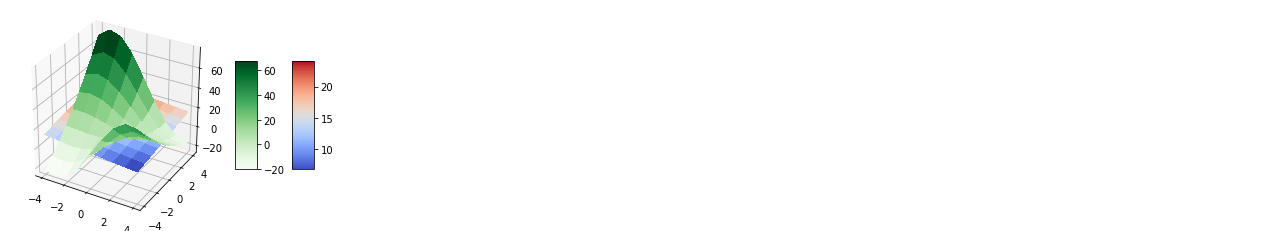

naučena funkcija za broj pravila = 2


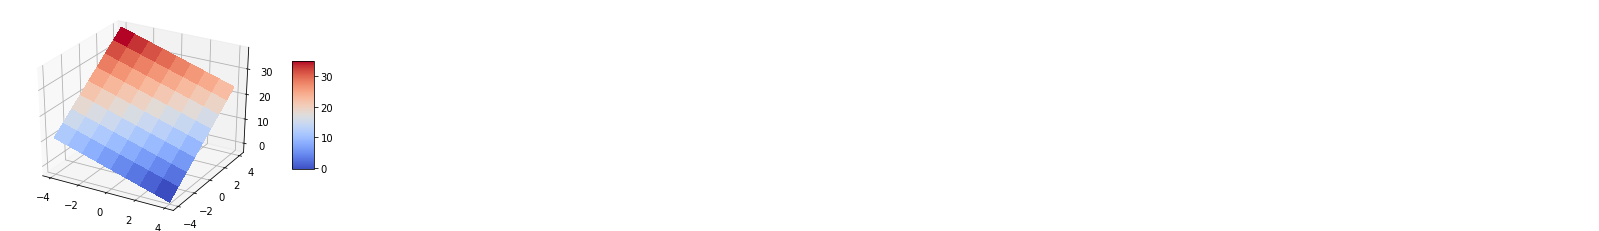

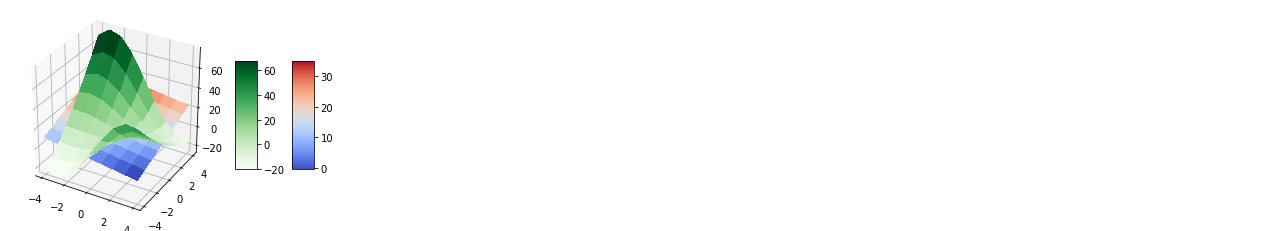

naučena funkcija za broj pravila = 5


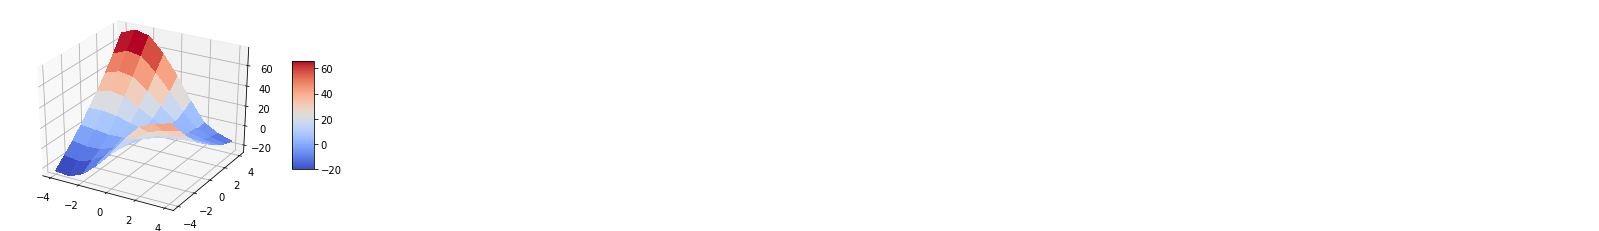

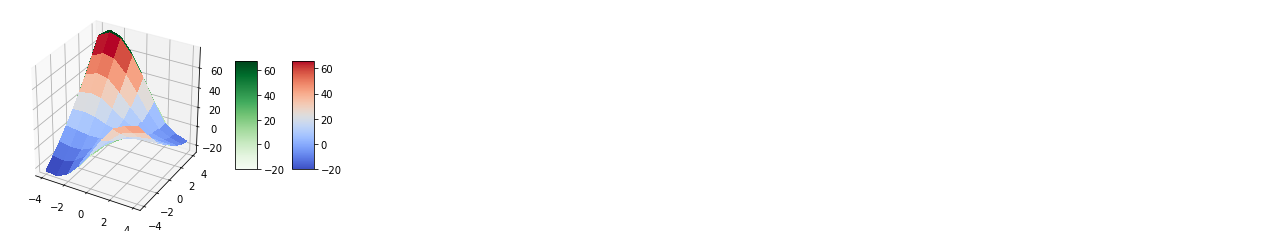

In [76]:
for i in [1, 2, 5]:
    print("naučena funkcija za broj pravila =", i)
    model = anfis.ANFIS(max_iter=10000, n_rules = i)
    model.fit_stohastic()

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = np.arange(-4, 5, 1)
    Y = np.arange(-4, 5, 1)
    X, Y = np.meshgrid(X, Y)
    Z = []
    Z_actual = f(X, Y)

    for x, y in zip(X, Y):
        Z.append([model.eval(a, b) for a, b in zip(x,y)])

    Z = np.array(Z)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    actual = ax.plot_surface(X, Y, Z_actual, cmap=cm.Greens,
                           linewidth=0, antialiased=False)
    fig.colorbar(actual, shrink=0.5, aspect=5)
    plt.show()


## 5. Zadatak

![slika 6](res/img/6.png)

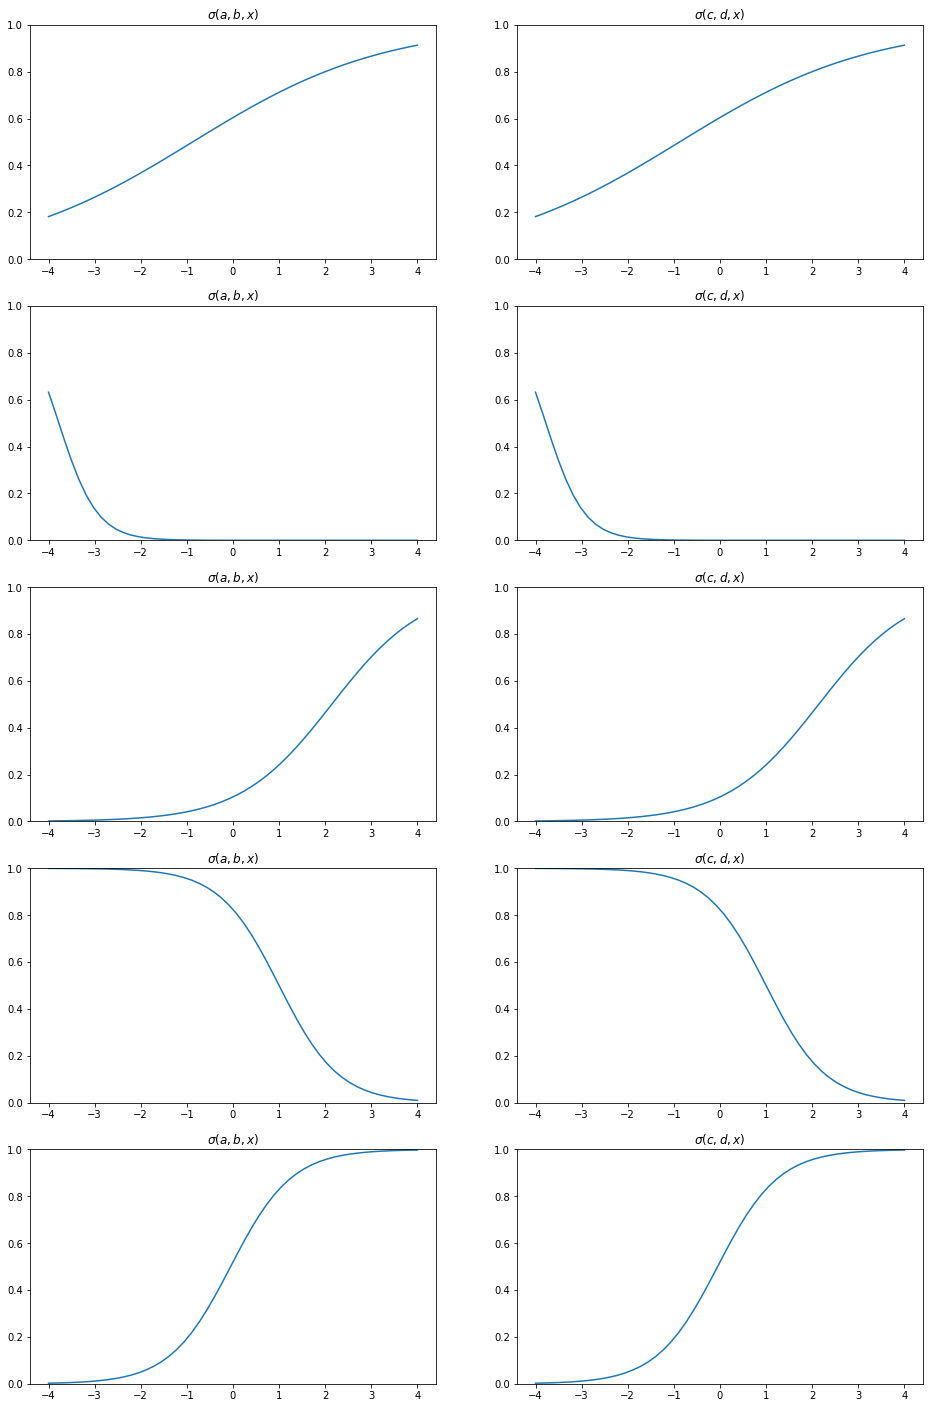

In [6]:
# Your code here
model = anfis.ANFIS(max_iter=10000, n_rules = 5)
model.fit_stohastic()

fig = plt.figure(figsize=(16, 5 * len(model.rules)))
X = np.linspace(-4, 4)
i = 1

for idx, rule in enumerate(model.rules):
    plt.subplot(len(model.rules), 2, i)
    plt.title(r'$\sigma(a,b,x)$')
    plt.ylim(top=1)
    plt.plot(X, [utils.sigmoid(x, rule.a, rule.b) for x in X])
    i = i + 1

    plt.subplot(len(model.rules), 2, i)
    plt.title(r'$\sigma(c,d,x)$')
    plt.ylim(top=1)
    plt.plot(X, [utils.sigmoid(x, rule.a, rule.b) for x in X])
    i = i + 1
    
plt.show()

## 6. Zadatak

![slika 7](res/img/7.png)

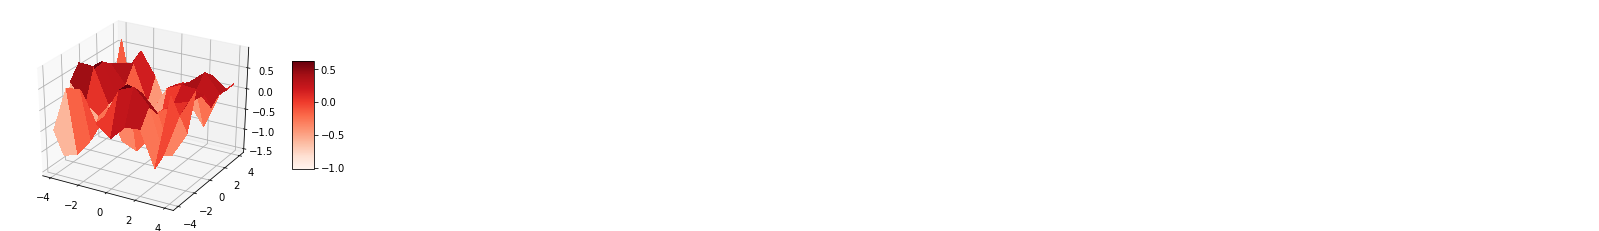

In [172]:
model = anfis.ANFIS(max_iter=10000, n_rules = i)
model.fit_stohastic()

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-4, 5, 1)
Y = np.arange(-4, 5, 1)
X, Y = np.meshgrid(X, Y)
Z = []
Z_actual = f(X, Y)

for x, y in zip(X, Y):
    Z.append([model.eval(a, b) for a, b in zip(x,y)])

Z = np.array(Z)
surf = ax.plot_surface(X, Y, Z - Z_actual, cmap=cm.Reds,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 7. Zadatak

![sedmi](res/img/10.png)

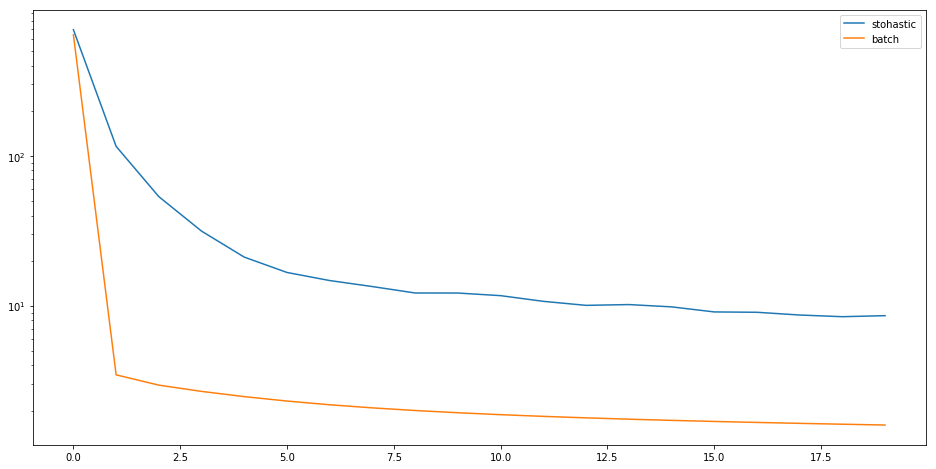

In [148]:
model1 = anfis.ANFIS(max_iter=10000, n_rules = 5, learning_rate=0.001)
model2 = anfis.ANFIS(max_iter=10000, n_rules = 5, learning_rate=0.001)

errors1 = model1.fit_stohastic()
errors2 = model2.fit_batch()

plt.figure(figsize=(16,8))
plt.plot(range(len(errors1)), errors1, label='stohastic')
plt.plot(range(len(errors2)), errors2, label='batch')
plt.yscale('log')
plt.legend()
plt.show()

## 8. Zadatak

![slika 8](res/img/8.png)
![slika 9](res/img/9.png)

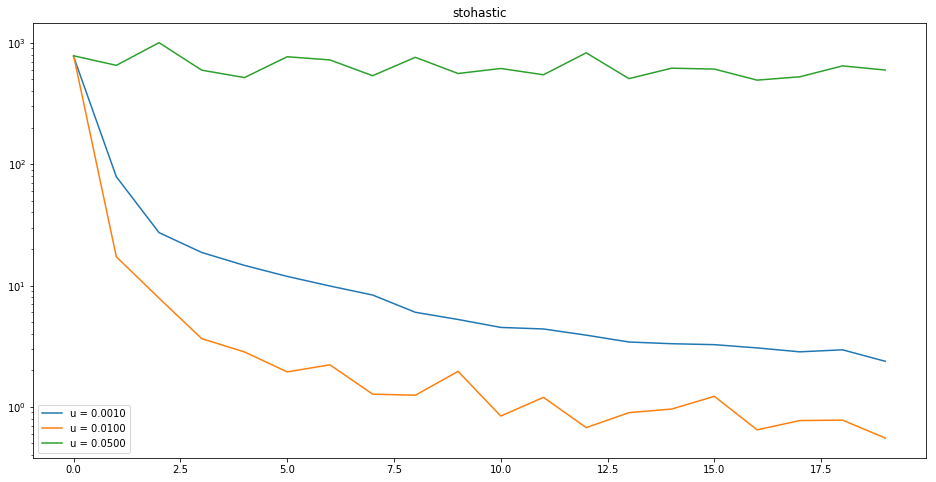

In [168]:
# Your code here
plt.figure(figsize=(16,8))
for u in [0.001, 0.01, 0.05]:
    model = anfis.ANFIS(max_iter=10000, n_rules = 5, learning_rate=u)
    errors = model.fit_stohastic()
    
    plt.plot(range(len(errors)), errors, label='u = %.4f' % (u))
    
plt.yscale('log')
plt.title('stohastic')
plt.legend()
plt.show()

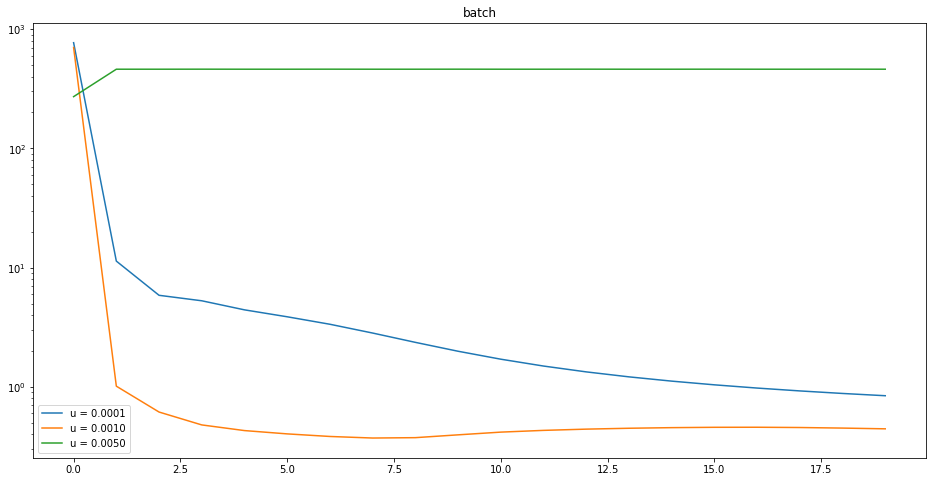

In [169]:
# Your code here
reload(anfis)

plt.figure(figsize=(16,8))
for u in [0.0001, 0.001, 0.005]:
    model = anfis.ANFIS(max_iter=10000, n_rules = 5, learning_rate=u)
    errors = model.fit_batch()
    
    plt.plot(range(len(errors)), errors, label='u = %.4f' % (u))
    
plt.yscale('log')
plt.title('batch')
plt.legend()
plt.show()